<a href="https://colab.research.google.com/github/Abdulla-creator-coder/Test-project/blob/main/homeloanproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""Data analysis report of the given dataset is
1.Target was given as 1 and o fro defaulters and non-defaulters
2.Total data was spread across 6 sheets which had to be collated
3.The datatypes were both numerical and objective
4.There was missing values in the dataset which was filled using median and most frequency method
5.Some of the numerical data had skewness which was addressed using log transform for positive values and power transform for zero and negative values
6.The numerical data had diferent ranges which was normalised by standardisation
7.Finally model tried with logistic regression, random forest and XGboost out of which XGboost gave better prediction"""

In [ ]:
""" The top 5 features for defaulters are

  ORGANIZATION_TYPE_FREQ
      0.000001

  CODE_GENDER_XNA
      -0.000066

  LANDAREA_MODE
      0.000464

  COMMONAREA_AVG
      0.000903

  NONLIVINGAPARTMENTS_AVG
      0.001025

The Least 5 features for Defaulters are
EXT_SOURCE_3
      -0.390839

NAME_EDUCATION_TYPE_Higher education
      -0.376692


FONDKAPREMONT_MODE_reg oper account
      -0.369873


EXT_SOURCE_2
      -0.333132


FLAG_OWN_CAR_Y
      -0.263361"""


In [ ]:
""" This dataset is tried with logistic regression, random forest,gradient boost and XGboost out of which XGboost gave better prediction.
The model ROC-AUC score for logistic regression is 0.73
Random forest is 0.745
GradientBoost is 0.76
XGBoost is 0.77"""

In [ ]:
"""The challenges faced in this project are
1.Bringing up all data into one dataframe
2.Handling missing data
3.Handling Numerical data and categorical data seperately
4.In categorical data also wide range of categories was there which was handled appropriately
5.Correcting the skewness of numerical data
6.Skewness also handled seperately for positive values and negative values
7.Wide range of different columns were there which had to be standardised
8.Excepy XGBoost all other models taken more time for computation"""

In [1]:
import pandas as pd #importing of library

In [2]:
from google.colab import drive # connecting to drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

app_train=pd.read_csv(r"/content/drive/MyDrive/AI/homeloan project/application_train.csv") #assigning files to variables
bureau=pd.read_csv(r"/content/drive/MyDrive/AI/homeloan project/bureau.csv")
pos_cash=pd.read_csv(r"/content/drive/MyDrive/AI/homeloan project/POS_CASH_balance.csv")
credit_card=pd.read_csv(r"/content/drive/MyDrive/AI/homeloan project/credit_card_balance.csv")
bureau_balance=pd.read_csv(r"/content/drive/MyDrive/AI/homeloan project/bureau_balance.csv")
installments=pd.read_csv(r"/content/drive/MyDrive/AI/homeloan project/installments_payments.csv")
previous_app=pd.read_csv(r"/content/drive/MyDrive/AI/homeloan project/previous_application.csv")

In [4]:
a=app_train.columns  # reading columns to find the unique column
b=bureau.columns
c=pos_cash.columns
d=credit_card.columns
e=bureau_balance.columns
f=installments.columns
g=previous_app.columns

In [5]:
for i in a:  # loop iteration to find unique columns
  for j in b:
    if i==j:
      print(i)

SK_ID_CURR
AMT_ANNUITY


In [6]:
for i in a:
  for j in c:
    if i==j:
      print(i)

SK_ID_CURR


In [7]:
for i in a:
  for j in d:
    if i==j:
      print(i)

SK_ID_CURR


In [8]:
for k in g:
  for j in e:
    if i==j:
      print(i)

In [9]:
e  # Bureau_balance file not having unique id

Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [10]:
app_train.head() #checking unique ID format

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
bureau_balance.head() # checking unique ID format

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [12]:
for i in a:
  for j in f:
    if i==j:
      print(i)

SK_ID_CURR


In [13]:
for i in a:
  for j in g:
    if i==j:
      print(i)

SK_ID_CURR
NAME_CONTRACT_TYPE
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START


In [14]:
for name, df in [('train', app_train), ('bureau', bureau), ('bureau_balance', bureau_balance),
                 ('pos_cash', pos_cash), ('credit_card', credit_card),
                 ('previous', previous_app), ('installments', installments)]:
    print(f"{name}: {df.shape}") #checking for dataframe shape

train: (307511, 122)
bureau: (1716428, 17)
bureau_balance: (27299925, 3)
pos_cash: (10001358, 8)
credit_card: (3840312, 23)
previous: (1670214, 37)
installments: (13605401, 8)


In [15]:
bureau.shape

(1716428, 17)

In [16]:
bureau_balance.shape

(27299925, 3)

In [17]:
bureau_agg = bureau.groupby('SK_ID_CURR').agg({
    'AMT_CREDIT_SUM': ['mean', 'sum', 'max'],
    'AMT_CREDIT_SUM_DEBT': ['mean', 'sum'],
    'CREDIT_DAY_OVERDUE': ['max'],
    'CNT_CREDIT_PROLONG': ['sum'],
    'SK_ID_BUREAU': 'count'
})

bureau_agg.head()

AMT_CREDIT_SUM                        AMT_CREDIT_SUM_DEBT  \
                     mean          sum       max                mean   
SK_ID_CURR                                                             
100001      207623.571429  1453365.000  378000.0        85240.928571   
100002      108131.945625   865055.565  450000.0        49156.200000   
100003      254350.125000  1017400.500  810000.0            0.000000   
100004       94518.900000   189037.800   94537.8            0.000000   
100005      219042.000000   657126.000  568800.0       189469.500000   

                     CREDIT_DAY_OVERDUE CNT_CREDIT_PROLONG SK_ID_BUREAU  
                 sum                max                sum        count  
SK_ID_CURR                                                               
100001      596686.5                  0                  0            7  
100002      245781.0                  0                  0            8  
100003           0.0                  0                  0            4  
100004           0.0                  0                  0            2  
100005      568408.5                  0                  0            3

In [18]:
h=bureau.columns
h

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [19]:
i=bureau_balance.columns
i

Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [20]:
for j in h:
  for k in i:
    if j==k:
      print(j)

SK_ID_BUREAU


In [21]:
bb = bureau_balance.merge(bureau[['SK_ID_BUREAU', 'SK_ID_CURR']], on='SK_ID_BUREAU', how='left')

In [22]:
bb_agg = bb.groupby('SK_ID_CURR').agg({
    'MONTHS_BALANCE': ['min', 'max', 'mean'],
    'STATUS': 'nunique'
})

In [23]:
prev = previous_app.groupby('SK_ID_CURR').agg({
    'AMT_ANNUITY': ['mean', 'max'],
    'AMT_CREDIT': ['mean', 'max'],
    'AMT_DOWN_PAYMENT': ['mean'],
    'DAYS_DECISION': 'mean',
    'SK_ID_PREV': 'count'
})

In [24]:
inst_agg = installments.groupby('SK_ID_CURR').agg({
    'AMT_PAYMENT': 'sum',
    'AMT_INSTALMENT': 'sum',
    'DAYS_ENTRY_PAYMENT': 'mean'
})

In [25]:
pos_agg = pos_cash.groupby('SK_ID_CURR').agg({
    'CNT_INSTALMENT_FUTURE': 'mean',
    'SK_ID_PREV': 'count'
})

In [26]:
cc_agg = credit_card.groupby('SK_ID_CURR').agg({
    'AMT_BALANCE': ['mean', 'max'],
    'AMT_CREDIT_LIMIT_ACTUAL': 'mean',
    'SK_ID_PREV': 'count'
})

In [27]:
bureau_agg.columns = ['_'.join(col) for col in bureau_agg.columns]
bb_agg.columns = ['_'.join(col) for col in bb_agg.columns]
prev.columns = ['_'.join(col) for col in prev.columns]
inst_agg.columns = ['_'.join(col) for col in inst_agg.columns]
pos_agg.columns = ['_'.join(col) for col in pos_agg.columns]
cc_agg.columns = ['_'.join(col) for col in cc_agg.columns]

In [28]:
train = app_train.merge(bureau_agg, on='SK_ID_CURR', how='left')



In [29]:
train = train.merge(bb_agg, on='SK_ID_CURR', how='left')
train = train.merge(prev, on='SK_ID_CURR', how='left')
train = train.merge(inst_agg, on='SK_ID_CURR', how='left')
train = train.merge(pos_agg, on='SK_ID_CURR', how='left')
train = train.merge(cc_agg, on='SK_ID_CURR', how='left')

In [30]:
pd.set_option('display.max_rows', None)
train.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,12


In [31]:
import matplotlib.pyplot as plt

In [32]:
import seaborn as sns

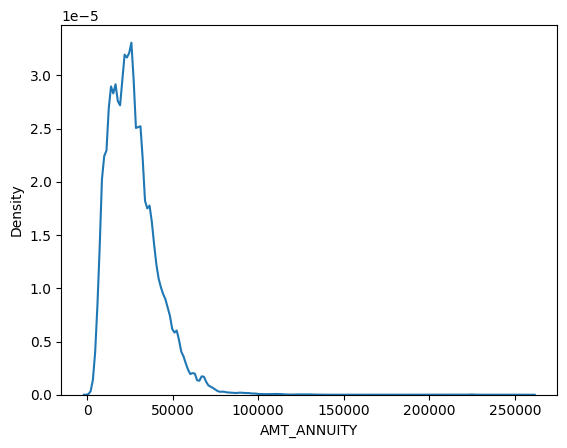

In [33]:
sns.kdeplot(train['AMT_ANNUITY'])
plt.show()


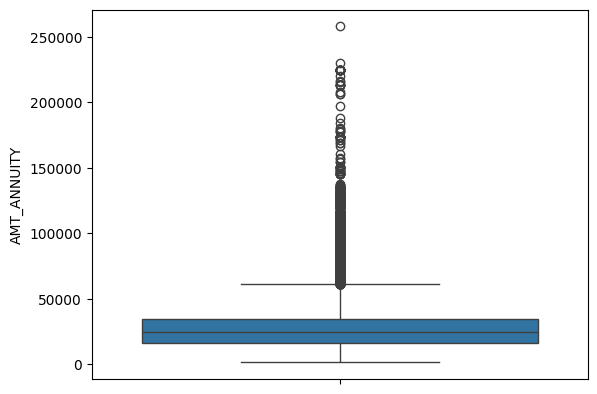

In [34]:
sns.boxplot(train['AMT_ANNUITY'])
plt.show()

In [35]:
import numpy as np
train['AMT_ANNUITY'] = np.log1p(train['AMT_ANNUITY'])

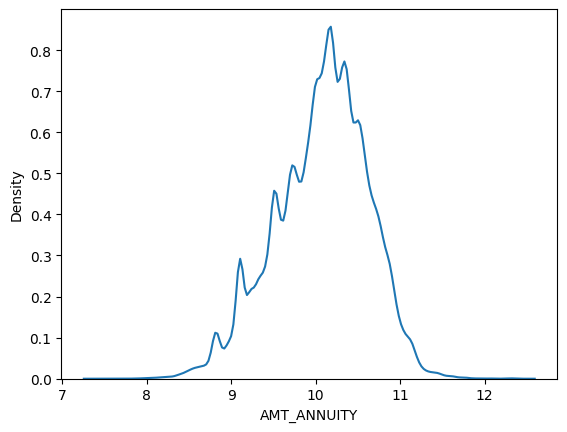

In [36]:
sns.kdeplot(train['AMT_ANNUITY'])
plt.show()

In [37]:
train['AMT_ANNUITY']=train['AMT_ANNUITY'].fillna(train['AMT_ANNUITY'].median())

In [38]:
train.dtypes

,0
SK_ID_CURR,int64
TARGET,int64
NAME_CONTRACT_TYPE,object
CODE_GENDER,object
FLAG_OWN_CAR,object
FLAG_OWN_REALTY,object
CNT_CHILDREN,int64
AMT_INCOME_TOTAL,float64
AMT_CREDIT,float64
AMT_ANNUITY,float64


In [39]:
num_cols=train.select_dtypes(include=['int64','float64']).columns
num_cols = num_cols.drop('TARGET', errors='ignore')
cat_cols=train.select_dtypes(include=['object']).columns

In [40]:
len(cat_cols)

16

In [41]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

train[num_cols] = num_imputer.fit_transform(train[num_cols])
train[cat_cols] = cat_imputer.fit_transform(train[cat_cols])

In [42]:
train.isnull().sum().sort_values(ascending=False)

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,0


In [43]:
skew=train[num_cols].skew().sort_values(ascending=False)
skew_df=pd.DataFrame(skew,columns=['Skew'])
skew_df
#

,Skew
FLAG_DOCUMENT_12,392.114779
AMT_INCOME_TOTAL,391.559654
FLAG_DOCUMENT_10,209.589054
FLAG_DOCUMENT_2,153.791817
AMT_REQ_CREDIT_BUREAU_QRT,141.400915
FLAG_DOCUMENT_4,110.894364
AMT_CREDIT_SUM_sum,81.067335
AMT_CREDIT_SUM_mean,72.494584
FLAG_DOCUMENT_7,72.174108
FLAG_DOCUMENT_17,61.214140


In [44]:
skewed_cols = skew[abs(skew) > 1].index
len(skewed_cols)

115

In [45]:
positive_skew_cols = skew[skew > 1].index

In [46]:
for col in positive_skew_cols:
    train[col] = np.log1p(train[col])

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [47]:
left_skew_cols = skew[skew < -1.0].index
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
train[left_skew_cols] = pt.fit_transform(train[left_skew_cols])

/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [48]:
train[skewed_cols].skew().sort_values(ascending=False)

/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


,0
FLAG_DOCUMENT_12,392.114779
FLAG_DOCUMENT_10,209.589054
FLAG_DOCUMENT_2,153.791817
FLAG_DOCUMENT_4,110.894364
FLAG_DOCUMENT_7,72.174108
FLAG_DOCUMENT_17,61.214140
FLAG_DOCUMENT_21,54.612939
FLAG_DOCUMENT_20,44.364897
FLAG_DOCUMENT_19,40.956134
FLAG_DOCUMENT_15,28.699333


In [49]:
train['DAYS_EMPLOYED'].describe()

,DAYS_EMPLOYED
count,5.537700e+04
mean,-inf
std,NaN
min,-inf
25%,1.280832e+01
50%,1.280832e+01
75%,1.280832e+01
max,1.280832e+01


In [50]:
import numpy as np
train = train.replace([np.inf, -np.inf], np.nan)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
train[num_cols] = imputer.fit_transform(train[num_cols])

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train[num_cols]=scaler.fit_transform(train[num_cols])

In [52]:
cat_cols=train.select_dtypes(include=['object']).columns

In [53]:
len(cat_cols)

16

In [54]:
unique_df = train[cat_cols].nunique().reset_index()
unique_df.columns = ['Column', 'Unique_Count']
unique_df

,Column,Unique_Count
0,NAME_CONTRACT_TYPE,2
1,CODE_GENDER,3
2,FLAG_OWN_CAR,2
3,FLAG_OWN_REALTY,2
4,NAME_TYPE_SUITE,7
5,NAME_INCOME_TYPE,8
6,NAME_EDUCATION_TYPE,5
7,NAME_FAMILY_STATUS,6
8,NAME_HOUSING_TYPE,6
9,OCCUPATION_TYPE,18


In [55]:
unique_counts = train[cat_cols].nunique()

low_card_cols = unique_counts[unique_counts <= 5].index
mid_card_cols = unique_counts[(unique_counts > 5) & (unique_counts <= 20)].index
high_card_cols = unique_counts[unique_counts > 20].index

In [56]:
train = pd.get_dummies(train, columns=low_card_cols, drop_first=True)

In [57]:
from sklearn.preprocessing import LabelEncoder

for col in mid_card_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))

In [58]:
for col in high_card_cols:
    freq = train[col].value_counts()
    train[col + '_FREQ'] = train[col].map(freq)
    train.drop(columns=col, inplace=True)

In [59]:
train.dtypes

,0
SK_ID_CURR,float64
TARGET,int64
CNT_CHILDREN,float64
AMT_INCOME_TOTAL,float64
AMT_CREDIT,float64
AMT_ANNUITY,float64
AMT_GOODS_PRICE,float64
NAME_TYPE_SUITE,int64
NAME_INCOME_TYPE,int64
NAME_FAMILY_STATUS,int64


In [60]:
train.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,0
AMT_GOODS_PRICE,0
NAME_TYPE_SUITE,0
NAME_INCOME_TYPE,0
NAME_FAMILY_STATUS,0


In [61]:
X = train.drop(columns=['TARGET', 'SK_ID_CURR'])
y = train['TARGET']

In [62]:
train['TARGET'].unique()

array([1, 0])

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [64]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict_proba(X_val)[:, 1]

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
 from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_val, y_pred)
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.7388176466223273


In [66]:
from sklearn.metrics import average_precision_score

pr_auc = average_precision_score(y_val, y_pred)
print("PR-AUC:", pr_auc)

PR-AUC: 0.21720682394323862


In [67]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9191258962977416


In [68]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred)
print(cm)

[[56467    71]
 [ 4903    62]]


In [73]:
feature_importance = pd.Series(
    lr.coef_[0],
    index=X.columns
).sort_values(key=abs, ascending=True)

feature_importance.head(5)

,0
ORGANIZATION_TYPE_FREQ,0.000001
CODE_GENDER_XNA,-0.000066
LANDAREA_MODE,0.000464
COMMONAREA_AVG,0.000903
NONLIVINGAPARTMENTS_AVG,0.001025


In [72]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)

y_prob_rf = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_prob_rf)

np.float64(0.7453958422815878)

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3
)

gb.fit(X_train, y_train)

y_prob_gb = gb.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_prob_gb)

np.float64(0.7627834047359069)

In [74]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight = (y_train==0).sum()/(y_train==1).sum(),
    eval_metric='auc',
    random_state=42
)

xgb.fit(X_train, y_train)

y_prob_xgb = xgb.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_prob_xgb)

np.float64(0.772664064276459)

In [75]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2']
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    scoring='roc_auc',
    cv=5
)

grid.fit(X_train, y_train)

grid.best_params_
grid.best_score_

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

np.float64(0.7403654910326516)

In [78]:
from sklearn.metrics import classification_report

In [80]:
y_test_prob = xgb.predict_proba(X_val)[:,1]

print("Test ROC-AUC:", roc_auc_score(y_val, y_test_prob))
print(classification_report(y_val, (y_test_prob > 0.3).astype(int)))

Test ROC-AUC: 0.772664064276459
              precision    recall  f1-score   support

           0       0.98      0.42      0.59     56538
           1       0.12      0.89      0.21      4965

    accuracy                           0.46     61503
   macro avg       0.55      0.66      0.40     61503
weighted avg       0.91      0.46      0.56     61503

